In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import csv

In [4]:
X_train = np.genfromtxt('X_train.csv', delimiter=',')
X_test = np.genfromtxt('X_test.csv', delimiter=',')
y_train = np.genfromtxt('y_train.csv', delimiter=',')
y_test = np.genfromtxt('y_test.csv', delimiter=',')

## Problem 2(a)

In [5]:
def calcWrr(X, y, l):
    d = X.shape[1]
    n = X.shape[0]
    assert n == y.shape[0]
    lI = l*np.identity(d)
    xTX = X.T.dot(X)
    xTy = X.T.dot(y)
    return np.linalg.inv(lI + xTX).dot(xTy)

def calcdfl(S, l):
    s = 0
    for i in S:
        s += (i**2)/((i**2) + l)
    return s
    

In [6]:
wrrs = []
dfls = []

In [7]:
U, S, V = np.linalg.svd(X_train, full_matrices=True)

In [8]:
for l in range(5001):
    wrrs.append(calcWrr(X_train, y_train, l))
    dfls.append(calcdfl(S, l))

In [9]:
wrr_a = np.array(wrrs)
dfl_a = np.array(dfls)

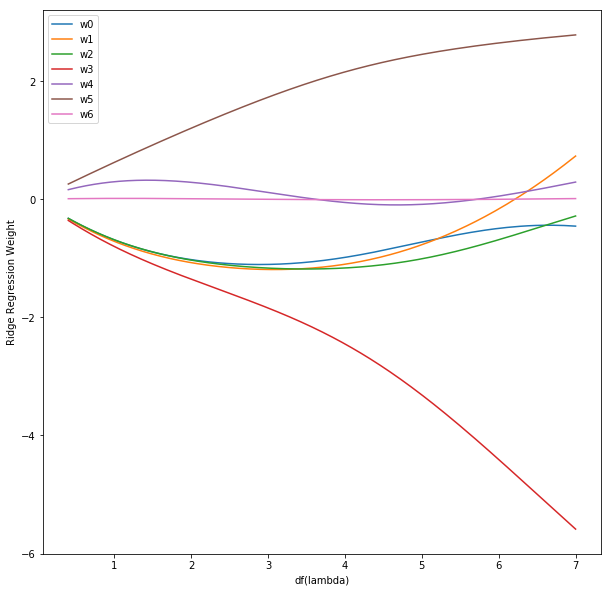

In [10]:
plt.figure(figsize = (10,10))
for i in range(7):
    plt.plot(dfl_a, wrr_a[:,i], label='w{}'.format(i))
    
plt.legend()
plt.xlabel('df(lambda)')
plt.ylabel('Ridge Regression Weight')
plt.savefig('wrr_vs_dfl.png')

## Problem 2(c)

In [11]:
def predict(wrr, X):
    return X.dot(wrr)

In [12]:
errs = []

In [13]:
for l in range(51):
    wrr = calcWrr(X_train, y_train, l)
    y_pred = predict(wrr, X_test)
    e = (np.linalg.norm(y_test - y_pred))**2
    e = (e/y_test.shape[0])**0.5
    errs.append(e)

In [15]:
errs[0]

2.6336435779691634

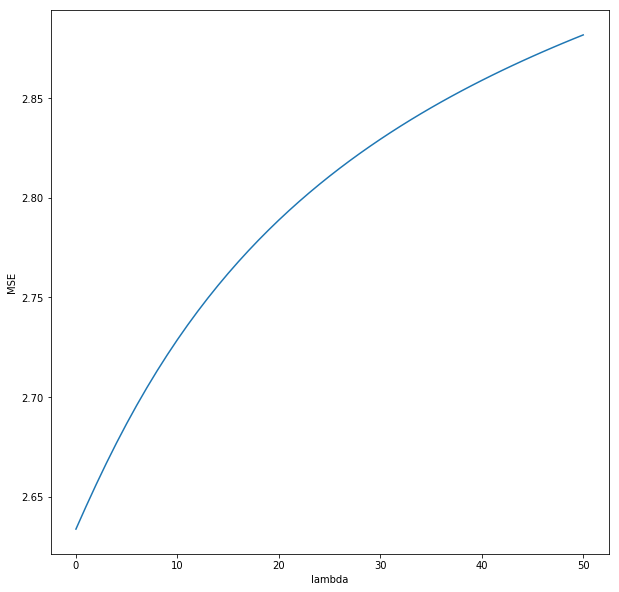

In [14]:
plt.figure(figsize = (10, 10))
plt.plot(range(51), errs)

plt.xlabel('lambda')
plt.ylabel('MSE')
plt.savefig('MSE_vs_lambda.png')

## Problem 2(d)

In [31]:
def makePth(X, p):
    temp = X
    for i in range(2, p+1):
        X_add = X[:, :-1]**i
        temp = np.concatenate((temp, X_add), axis=1)
    return temp

In [32]:
X_train_p = makePth(X_train, 3)
X_test_p = makePth(X_test, 3)

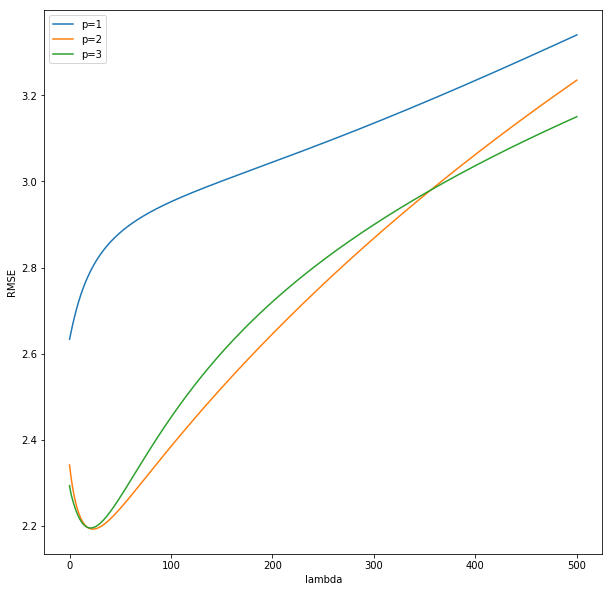

In [42]:
plt.figure(figsize = (10, 10))
for p in range(1, 4):
    X_train_curr = X_train_p[:,:(7*p - 1)]
    X_test_curr = X_test_p[:,:(7*p - 1)]
    errs = []
    for l in range(501):
        wrr = calcWrr(X_train_curr, y_train, l)
        y_pred = predict(wrr, X_test_curr)
        e = (np.linalg.norm(y_test - y_pred))
        e = e/np.sqrt(y_test.shape[0])
        errs.append(e)
    plt.plot(range(501), errs, label='p={}'.format(p))

plt.legend()
plt.xlabel('lambda')
plt.ylabel('RMSE')
plt.savefig('RMSE_vs_lambda_p.png')